Saving Laptop_price.csv to Laptop_price (3).csv
Dataset Overview:
    Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0    Asus         3.830296        16               512    11.185147  2.641094   
1    Acer         2.912833         4              1000    11.311372  3.260012   
2  Lenovo         3.241627         4               256    11.853023  2.029061   
3    Acer         3.806248        16               512    12.280360  4.573865   
4    Acer         3.268097        32              1000    14.990877  4.193472   

          Price  
0  17395.093065  
1  31607.605919  
2   9291.023542  
3  17436.728334  
4  32917.990718  

Descriptive Statistics:
       Processor_Speed     RAM_Size  Storage_Capacity  Screen_Size  \
count      1000.000000  1000.000000       1000.000000  1000.000000   
mean          2.750611    15.500000        584.576000    14.056790   
std           0.731796    10.988665        313.438517     1.705882   
min           1.511580     4.00000

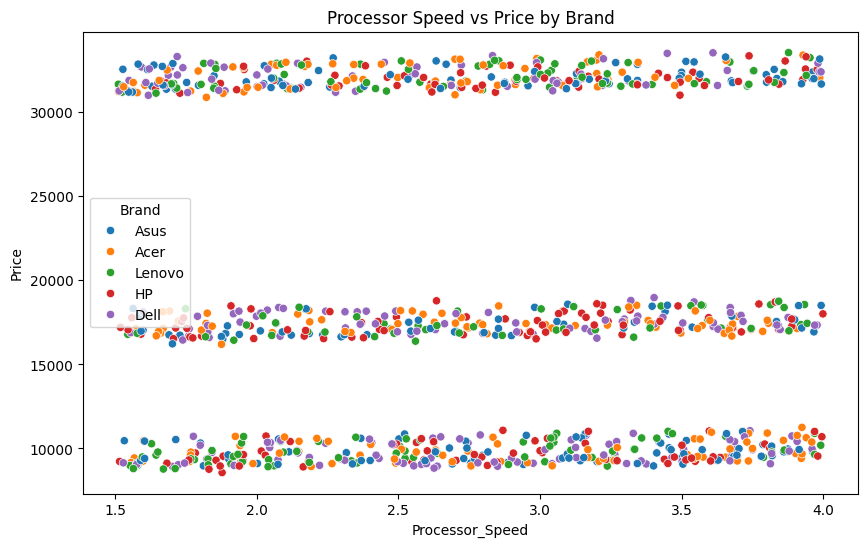

ValueError: could not convert string to float: 'Asus'

<Figure size 800x600 with 0 Axes>

In [5]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Upload the dataset to Google Colab
# You will be prompted to upload the file from your local machine
from google.colab import files
uploaded = files.upload()

# Step 3: Load the dataset
# The key for the uploaded file should match exactly with what is in the 'uploaded' dictionary
import io
file_name = list(uploaded.keys())[0]  # Get the uploaded file's name dynamically
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Step 4: Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

# Step 5: Basic descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Step 6: Visualize the relationship between features and price
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Processor_Speed', y='Price', hue='Brand')
plt.title('Processor Speed vs Price by Brand')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 7: Example of linear regression (Predicting Price based on Processor Speed and RAM)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df[['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight']]
y = df['Price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Display the model performance
from sklearn.metrics import mean_absolute_error, r2_score
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R-squared Score: {r2_score(y_test, y_pred)}")
